In [1]:
import sys
sys.path.append('..')
# %matplotlib notebook
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt
from core import Core

from global_var import COLORS


In [2]:
print(COLORS)
COLORS.append('#44DD55')

['#ffb200', '#0284C0', '#DD5544', '#008000', '#DD84C0', '#000000']


In [29]:
COLORS += COLORS

In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [20]:
folder = r'C:\SPRUP_data_Jenda\2021_09_08_noise/'.replace('\\', '/')


for i in range(1, 13):
    print(i)    
    name = 'raw_{:02d}_3'.format(i)
    core = Core(folder, name)
    core.k = 10

    core.type = 'raw'
    core_raw_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_raw_int = [np.average(core.frame(i)) for i in range(len(core))]


    core.type = 'diff'
    core_diff_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_diff_int = [np.average(np.abs(core.frame(i))) for i in range(len(core))]
    
    np.save(folder + name + '_raw_int' + '.npy', core_raw_int)
    np.save(folder + name + '_raw_std' + '.npy', core_raw_std)
    
    np.save(folder + name + '_diff_int' + '.npy', core_diff_int)
    np.save(folder + name + '_diff_std' + '.npy', core_diff_std)
    
    np.save(folder + name + '_time' + '.npy', core._time_info[:,0])
    
    std = np.std(core._data_raw, axis = 2)
    np.save(folder + name + '_raw_std_px' + '.npy', np.average(std))

1
core 3: SPR file not found. Diseable ploting of SPR. 
2
core 3: SPR file not found. Diseable ploting of SPR. 
3
core 3: SPR file not found. Diseable ploting of SPR. 
4
core 3: SPR file not found. Diseable ploting of SPR. 
5
core 3: SPR file not found. Diseable ploting of SPR. 
6
core 3: SPR file not found. Diseable ploting of SPR. 
7
core 3: SPR file not found. Diseable ploting of SPR. 
8
core 3: SPR file not found. Diseable ploting of SPR. 
9
core 3: SPR file not found. Diseable ploting of SPR. 
10
core 3: SPR file not found. Diseable ploting of SPR. 
11
core 3: SPR file not found. Diseable ploting of SPR. 
12
core 3: SPR file not found. Diseable ploting of SPR. 


In [4]:
area = 1936 * 1216


In [5]:
folder = r'C:\SPRUP_data_Jenda\2021_09_08_noise/'.replace('\\', '/')



frame_time = [0.1046, 0.1046, 0.1046, 0.1046, 0.1308, 0.1308, 0.1046, 0.1046, 0.1046, 0.1046, 0.1308, 0.1003]
frame_time = [f*10 for f in frame_time] # per 100 ms

ets = [12.5, 12.5, 12.5, 12.5, 5, 5, 12.5, 12.5, 12.5, 12.5, 5, 25]
avg = [8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 10, 4]
ma = ['sc'] * 6 + [58.7] * 6

des = [
    'TM, run',
    'TE, run',
    'TM, stopped',
    'TE, stopped',
    'TE, run',
    'TM, run',
    'TM, run',
    'TE, run',
    'TE, stopped',
    'TM, stopped',
    'TM, stopped',
    'TM, stopped'
      ]



raw_int = []
raw_std = []
raw_std_px = []


diff_int = []
diff_std = []
time = []

depth = 32700

for i in range(1,13):
    name = 'raw_{:02d}_3'.format(i)
    raw_int.append(np.load(folder + name + '_raw_int' + '.npy')*depth)
    raw_std.append(np.load(folder + name + '_raw_std' + '.npy')*depth)
    raw_std_px.append(np.load(folder + name + '_raw_std_px' + '.npy')*depth)
    
    
    diff_std.append(np.load(folder + name + '_diff_std' + '.npy')*depth)
    diff_int.append(np.load(folder + name + '_diff_int' + '.npy')*depth)
    time.append(np.load(folder + name + '_time' + '.npy')*depth)    
    
    


In [19]:
correction = [frame_time[i] / ets[i] / avg[i] * 1000 for i in range(12)]
# intensity = [np.average(raw_int[i])*avg[i]/frame_time[i] for i in range(7)]
e_count = [np.average(raw_int[i]) for i in range(12)]

print(intensity)
print(correction)
print(e_count)

[9053.004987062472, 61490.658239645396, 9128.123429388212, 62175.35222999, 24561.637849772105, 3561.4385577422536, 26745.32413346904]
[10.46, 10.46, 10.46, 10.46, 26.16, 26.16, 10.46, 10.46, 10.46, 10.46, 26.16, 10.030000000000001]
[1183.6804020584182, 8039.903564833636, 1193.5021383925086, 8129.427304071192, 3212.6622307501916, 465.8361633526868, 3496.951130451077, 16697.372583405402, 16759.457113552726, 3504.6925846955664, 1393.0470428692665, 7018.224191039047]


In [20]:
print([int((e*avg[i]**-1)**0.5) for i, e in enumerate(e_count)])
print([int(r) for r in raw_std_px])

[12, 31, 12, 31, 17, 6, 20, 45, 45, 20, 11, 41]
[14, 50, 14, 40, 19, 10, 26, 71, 52, 22, 12, 51]


1.4459534934287497
1.0186082878386589
[0.45481649875312197, 1.0]
[0.4581428317093162, 1.0]
[0.6708622380123841, 1.0]
--------------------
[0.0009814044681936069, 0.002157803137933923]
[0.0027360935195443574, 0.005972140848163182]
[0.004309382069684893, 0.006423646801842112]
[0.0017679381056213569, 0.0022325411167724]


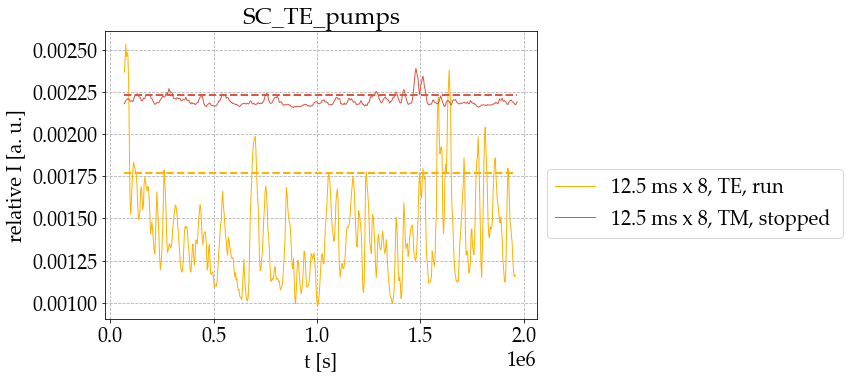

In [40]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')

title = 'SC_TE_pumps'
axes.set_title(title)
axes.set_xlabel('t [s]')
# axes.set_ylabel('std [a. u.]')
# axes.set_ylabel('I [a. u.]')
axes.set_ylabel('relative I [a. u.]')



ii = []
levels = []
effective_noise_levels = []
nsr = []
nsr_std = []

for i in [8, 10]:
    i -= 1
    
#     if i == 0:
#         variable = diff_int[i][20:]/e_count[1]
#     else:
        
    variable = diff_int[i][20:]/e_count[i]

    
    axes.plot(
        time[i][20:], 
        variable, 
        linewidth=1, 
        label = '{} ms x {}, {} '.format(ets[i], avg[i], des[i]), 
        color = COLORS[i]
    )
    
    level = np.min(variable)
    
    variable_sorted = np.sort(variable)
    
    effective_noise_levels.append(variable_sorted[int(np.round(0.9*len(variable)))-1])
    
    
    
    
    
    level_avg = np.average(variable)
    
    print(level_avg/level)
    
    levels.append(level)
#     nsr.append(1/(e_count[i])**0.5)


    nsr.append((1/e_count[i]/avg[i])**0.5)
    
    nsr_std.append(raw_std_px[i]/e_count[i])
    
    axes.plot(
        time[i][20:], 
        effective_noise_levels[-1] * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '--', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
        
#     axes.plot(
#         time[i][20:], 
#         level * np.ones(len(time[i][20:])),      
#         linewidth=2, 
#         ls = '-.', 
# #         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
#         color = COLORS[i]
#     )
    

    
    ii.append(i)
    
print([l/levels[-1] for l in levels])
print([n/nsr[-1] for n in nsr])
print([n/nsr_std[-1] for n in nsr_std])

print('-'*20)

print(levels)
print(nsr)
print(nsr_std)
print(effective_noise_levels)

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig(folder + 'plots/' + title +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


In [101]:
for i in [5, 6]:
    print(intensity[i])
    print(intensity_uncor[i])
    print(correction[i])
    print(e_count[i])
    print(e_count[i]**0.5)


    print('-'*20)



56635.10403955727
59240.31882537691
10.46
7405.039853172114
86.05254123599207
--------------------
22618.94591148483
29517.724414487704
26.1
2951.77244144877
54.3302166519587
--------------------


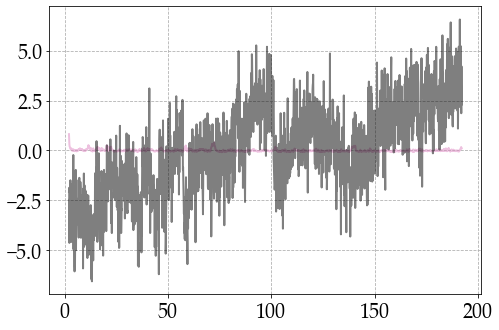

In [7]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
i = 4
axes.plot(
    std_time[i][20:], 
    diff_std[i][20:] - np.average(diff_std[i][20:]), 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i],
    alpha = 0.5
)

axes.plot(
    std_time[i][20:], 
    raw_std[i][20:] - np.average(raw_std[i][20:]), 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i+1],
    alpha = 0.5
    
)

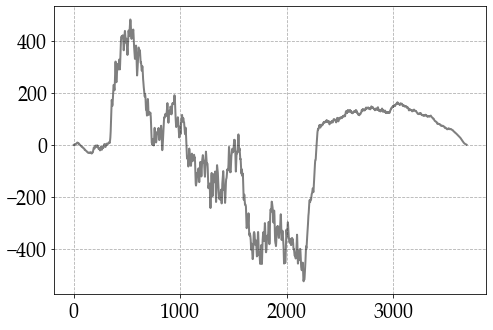

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
i = 5

correlation = np.correlate(
    diff_int[i][20:] - np.average(diff_int[i][20:]), 
    raw_std[i][20:] - np.average(raw_std[i][20:]), 
    mode = 'full')


axes.plot(
    correlation, 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i],
    alpha = 0.5
)


[66375.03563748217, 58965.77708646618]
[1.002, 1.003]
[16560.63763410234, 14697.352214971632]


In [99]:
182.84992948016145/124.46422527311236

1.469096273077128